# loan eligibility prediction
### https://www.kaggle.com/vikasukani/loan-eligible-dataset

### loading data

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df=pd.read_csv('loan-train.csv')
df_test=pd.read_csv('loan-test.csv')

In [123]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [124]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## EDA

In [125]:
df.shape

(614, 13)

In [126]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [127]:
len(df.columns)

13

In [128]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [129]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [130]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [131]:
len(numerical_features)/df.shape[1]*100

38.46153846153847

In [132]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [133]:
nan_features_df=[feature for feature in df.columns if (df[feature].isnull().sum())>0] 
nan_features_df

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [134]:
len(nan_features_df)/df.shape[1] # nan columns percentage out of total

0.5384615384615384

In [135]:
# missing data from train dataset
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
#percent = (train.isnull().sum()/len(train)).sort_values(ascending=False) we can do as
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
#print(missing_data['Percent'].mean())
missing_data.head(30)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [136]:
missing_data=missing_data[missing_data['Total']>0]
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886


In [137]:
missing_data['Percent'].mean()

0.03466728711028386

***droping the nan values***

In [138]:
df.dropna().shape[0]/len(df)*100

78.17589576547232

In [139]:
df=df.dropna()

In [140]:
df.shape

(480, 13)

In [141]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [142]:
df['Loan_Status']=(df['Loan_Status']=='Y').astype(int)

In [143]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

### Eligble VS not eligble

In [144]:
eligible=df.groupby('Loan_Status').get_group(1)


In [145]:
non_eligible=df.groupby('Loan_Status').get_group(0)

In [146]:
eligible

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1


In [147]:
len(eligible)

332

In [148]:
eligible['Dependents'].value_counts()/len(eligible)*100

0     56.325301
2     19.578313
1     15.662651
3+     8.433735
Name: Dependents, dtype: float64

In [149]:
non_eligible['Dependents'].value_counts()/len(non_eligible)*100

0     58.783784
1     18.918919
2     13.513514
3+     8.783784
Name: Dependents, dtype: float64

<BarContainer object of 4 artists>

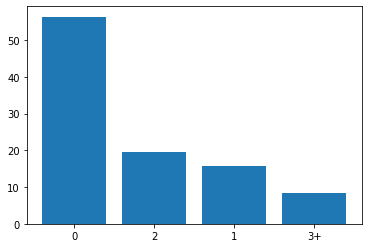

In [150]:
plt.bar(eligible['Dependents'].unique(),eligible['Dependents'].value_counts()/len(eligible)*100)

<BarContainer object of 4 artists>

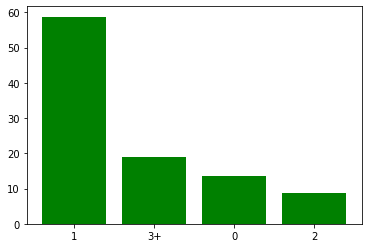

In [151]:
plt.bar(non_eligible['Dependents'].unique(),non_eligible['Dependents'].value_counts()/len(non_eligible)*100,color='g')

In [248]:
# import numpy as np
# import matplotlib.pyplot as plt

# X =df['Dependents'].unique()
# Ygirls = eligible['Dependents'].value_counts()/len(eligible)*100
# Zboys =  non_eligible['Dependents'].value_counts()/len(non_eligible)*100

# X_axis = np.arange(len(X))

# plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'eligible')
# plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'non_eligible')

# plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()

In [259]:
x=list(non_eligible['Dependents'].unique())

In [261]:
xpos = np.arange(len(x))
print(xpos)
xpos

[0 1 2 3]


array([0, 1, 2, 3])

In [273]:
y1=[56.325301204819276,15.66265060240964 ,19.57831325301205 , 8.433734939759036]
y2=list(non_eligible['Dependents'].value_counts()/len(non_eligible)*100)

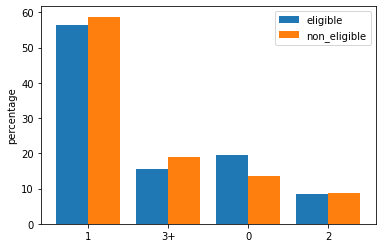

In [274]:
plt.bar(xpos-0.2,y1, width=0.4, label="eligible")
plt.bar(xpos+0.2,y2, width=0.4,label="non_eligible")

plt.xticks(xpos,x)
plt.ylabel("percentage")
#plt.title('US Technology Stocks')
plt.legend()

In [154]:
eligible['Gender'].value_counts()/len(eligible)*100

Male      83.73494
Female    16.26506
Name: Gender, dtype: float64

In [155]:
non_eligible['Gender'].value_counts()/len(non_eligible)*100

Male      78.378378
Female    21.621622
Name: Gender, dtype: float64

In [156]:
eligible['Married'].value_counts()/len(eligible)*100

Yes    68.373494
No     31.626506
Name: Married, dtype: float64

In [157]:
non_eligible['Married'].value_counts()/len(non_eligible)*100

Yes    56.756757
No     43.243243
Name: Married, dtype: float64

In [158]:
eligible['Education'].value_counts()/len(eligible)*100

Graduate        81.626506
Not Graduate    18.373494
Name: Education, dtype: float64

In [159]:
# import math 
# x = eligible['Education'].value_counts()[0]/len(eligible)*100
# y = eligible['Education'].value_counts()[1]/len(eligible)*100
# print(str(int(round(x / (math.gcd(50, 10)),0))) + ':'+ str(int(round(y / (math.gcd(50, 10)),0))))

In [160]:
non_eligible['Education'].value_counts()/len(non_eligible)*100

Graduate        75.675676
Not Graduate    24.324324
Name: Education, dtype: float64

In [161]:
# import math 
# x = 75
# y = 25
# print(str(int(round(x / (math.gcd(50, 10)),0))) + ':'+ str(int(round(y / (math.gcd(50, 10)),0))))

In [162]:
eligible['Self_Employed'].value_counts()/len(eligible)*100

No     87.048193
Yes    12.951807
Name: Self_Employed, dtype: float64

In [163]:
non_eligible['Self_Employed'].value_counts()/len(non_eligible)*100

No     84.459459
Yes    15.540541
Name: Self_Employed, dtype: float64

In [164]:
eligible['ApplicantIncome'].value_counts()/len(eligible)*100

2500    1.807229
8333    1.204819
6250    1.204819
3500    0.903614
6000    0.903614
          ...   
5829    0.301205
7740    0.301205
3273    0.301205
3095    0.301205
4095    0.301205
Name: ApplicantIncome, Length: 296, dtype: float64

In [165]:
df['ApplicantIncome'].max()

81000

In [166]:
eligible['ApplicantIncome'].max()

39999

In [167]:
med=df['ApplicantIncome'].median()
med

3859.0

In [168]:
(eligible['ApplicantIncome']<med).value_counts()/len(eligible)*100

False    50.0
True     50.0
Name: ApplicantIncome, dtype: float64

In [169]:
p_25=eligible['ApplicantIncome'].quantile(0.25)

In [170]:
p_50=eligible['ApplicantIncome'].quantile(0.5)

In [171]:
p_75=eligible['ApplicantIncome'].quantile(0.75)

In [172]:
p_100=eligible['ApplicantIncome'].quantile(1)

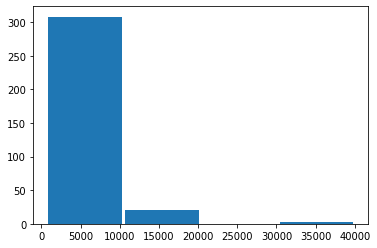

In [173]:
plt.hist(eligible['ApplicantIncome'],rwidth=0.95,bins=4)
plt.show()

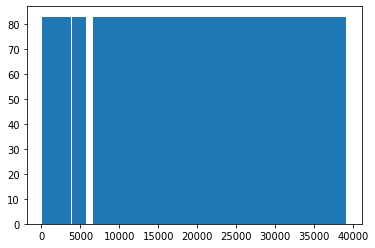

In [174]:
plt.hist(eligible['ApplicantIncome'],rwidth=0.95,bins=[0,p_25,p_50,p_75,p_100])
plt.show()

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


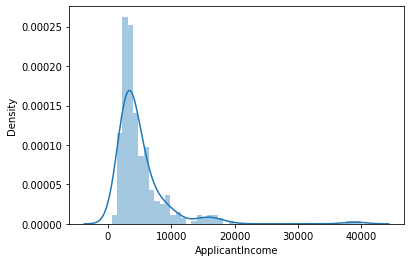

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
x=eligible['ApplicantIncome']
ax = sns.distplot(x)
plt.show()

In [176]:
non_eligible['ApplicantIncome'].max()

81000

In [177]:
(non_eligible['ApplicantIncome']<df['ApplicantIncome'].median()).value_counts()/len(non_eligible)*100

False    50.675676
True     49.324324
Name: ApplicantIncome, dtype: float64

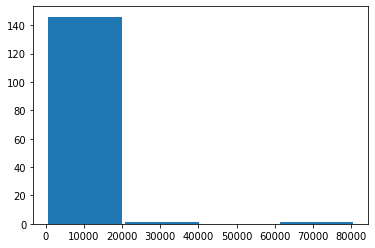

In [178]:
plt.hist(non_eligible['ApplicantIncome'],rwidth=0.95,bins=4)
plt.show()

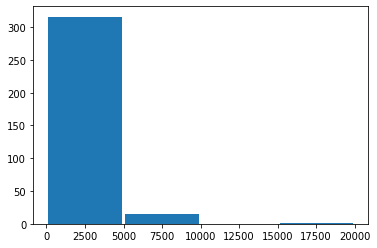

In [179]:
plt.hist(eligible['CoapplicantIncome'],rwidth=0.95,bins=4)
plt.show()

In [180]:
(eligible['CoapplicantIncome']<df['CoapplicantIncome'].median()).value_counts()/len(eligible)*100

False    51.204819
True     48.795181
Name: CoapplicantIncome, dtype: float64

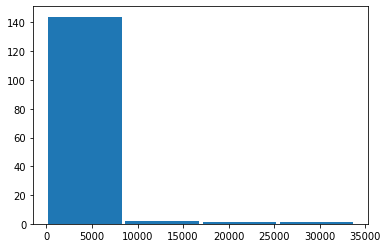

In [181]:
plt.hist(non_eligible['CoapplicantIncome'],rwidth=0.95,bins=4)
plt.show()

In [182]:
(non_eligible['CoapplicantIncome']<df['CoapplicantIncome'].median()).value_counts()/len(non_eligible)*100

True     52.702703
False    47.297297
Name: CoapplicantIncome, dtype: float64

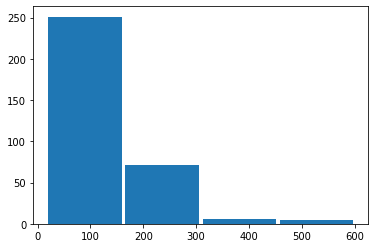

In [183]:
plt.hist(eligible['LoanAmount'],rwidth=0.95,bins=4)
plt.show()

In [184]:
(eligible['LoanAmount']<df['LoanAmount'].quantile(0.75)).value_counts()/len(eligible)*100

True     76.807229
False    23.192771
Name: LoanAmount, dtype: float64

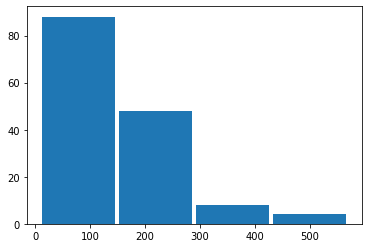

In [185]:
plt.hist(non_eligible['LoanAmount'],rwidth=0.95,bins=4)
plt.show()

In [186]:
(non_eligible['LoanAmount']<df['LoanAmount'].quantile(0.75)).value_counts()/len(non_eligible)*100

True     69.594595
False    30.405405
Name: LoanAmount, dtype: float64

In [187]:
eligible['Loan_Amount_Term'].value_counts()/len(eligible)*100

360.0    87.951807
180.0     7.228916
300.0     1.204819
480.0     1.204819
120.0     0.903614
84.0      0.602410
60.0      0.602410
240.0     0.301205
Name: Loan_Amount_Term, dtype: float64

In [188]:
non_eligible['Loan_Amount_Term'].value_counts()/len(non_eligible)*100

360.0    80.405405
180.0     8.108108
480.0     5.405405
300.0     3.378378
36.0      1.351351
84.0      0.675676
240.0     0.675676
Name: Loan_Amount_Term, dtype: float64

In [189]:
(eligible['Loan_Amount_Term']<df['Loan_Amount_Term'].median()).value_counts()/len(eligible)*100

False    89.156627
True     10.843373
Name: Loan_Amount_Term, dtype: float64

In [190]:
(non_eligible['Loan_Amount_Term']<df['Loan_Amount_Term'].median()).value_counts()/len(non_eligible)*100

False    85.810811
True     14.189189
Name: Loan_Amount_Term, dtype: float64

In [191]:
eligible['Credit_History'].value_counts()/len(eligible)*100

1.0    97.891566
0.0     2.108434
Name: Credit_History, dtype: float64

In [192]:
non_eligible['Credit_History'].value_counts()/len(non_eligible)*100

1.0    57.432432
0.0    42.567568
Name: Credit_History, dtype: float64

In [193]:
eligible['Property_Area'].value_counts()/len(eligible)*100

Semiurban    44.879518
Urban        29.518072
Rural        25.602410
Name: Property_Area, dtype: float64

In [194]:
non_eligible['Property_Area'].value_counts()/len(non_eligible)*100

Rural        36.486486
Urban        35.135135
Semiurban    28.378378
Name: Property_Area, dtype: float64

In [195]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [196]:
df['Gender']=(df['Gender']=='Male').astype(int)

In [197]:
df['Married']=(df['Married']=='Yes').astype(int)

In [198]:
df['Education']=(df['Education']=='Graduate').astype(int)

In [199]:
df['Self_Employed']=(df['Self_Employed']=='Yes').astype(int)

In [200]:
df['Dependents']=(df['Dependents']=='3+').astype(int)

In [201]:
df['Dependents']=(df['Dependents']=='3+').astype(int)

In [202]:
df['Property_Area']=(df['Property_Area']=='Rural').astype(int)

### relationship bw features

In [203]:
c_matrix=df.corr()

In [204]:
c_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.529390
Married              0.112321
Education            0.068437
Gender               0.064504
Loan_Amount_Term    -0.007798
Self_Employed       -0.034715
ApplicantIncome     -0.043152
CoapplicantIncome   -0.049020
LoanAmount          -0.071753
Property_Area       -0.110817
Dependents                NaN
Name: Loan_Status, dtype: float64

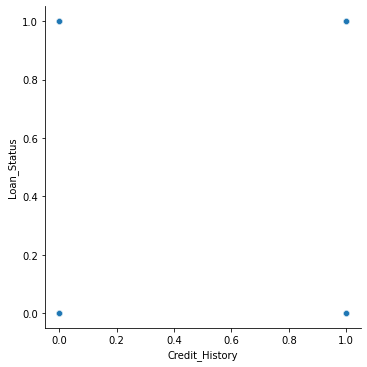

In [205]:
sns.relplot(x="Credit_History",y="Loan_Status",data=df)

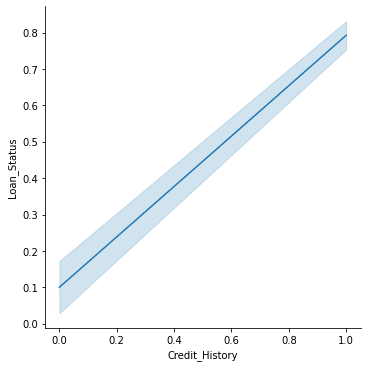

In [206]:
sns.relplot(x="Credit_History",y="Loan_Status",data=df,kind='line')

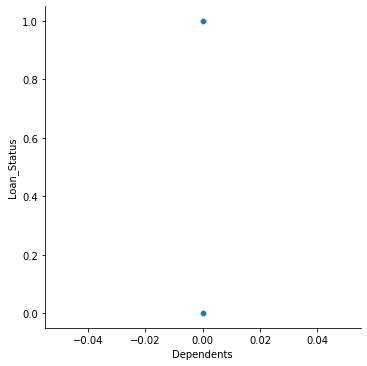

In [207]:
sns.relplot(x="Dependents",y="Loan_Status",data=df)

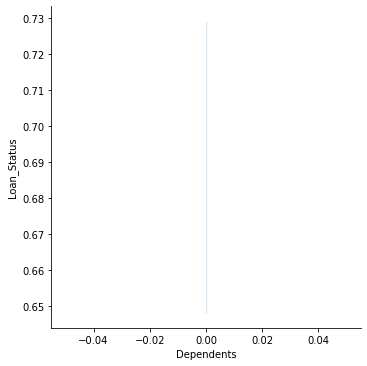

In [208]:
sns.relplot(x="Dependents",y="Loan_Status",data=df,kind='line')

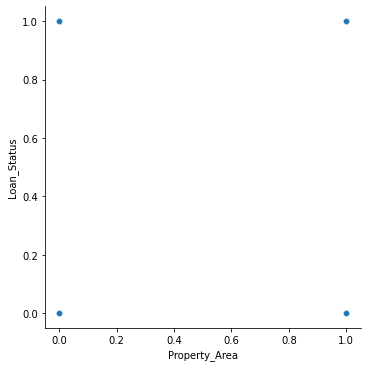

In [209]:
sns.relplot(x="Property_Area",y="Loan_Status",data=df)

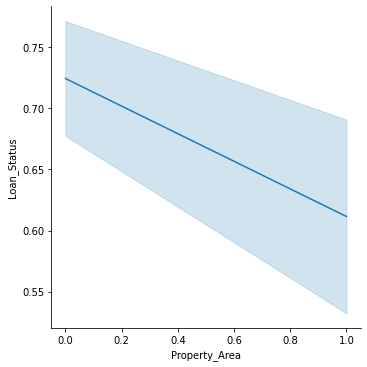

In [210]:
sns.relplot(x="Property_Area",y="Loan_Status",data=df,kind='line')

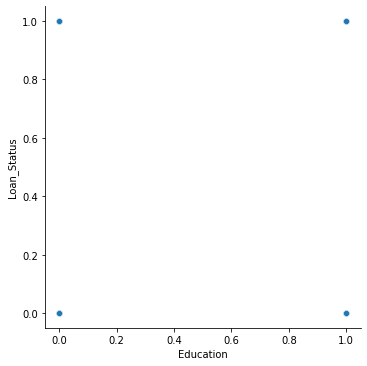

In [211]:
sns.relplot(x="Education",y="Loan_Status",data=df)

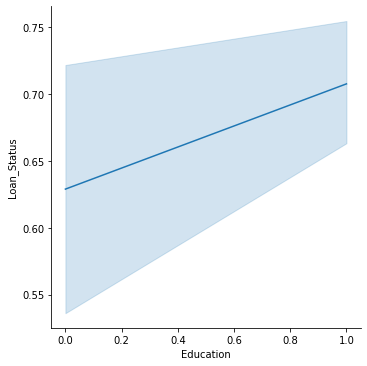

In [212]:
sns.relplot(x="Education",y="Loan_Status",data=df,kind='line')

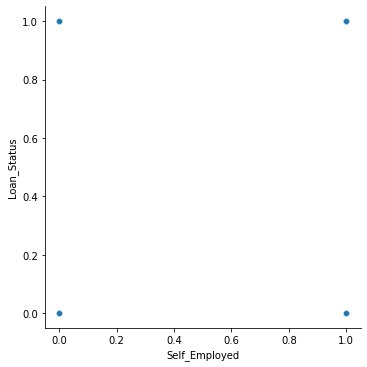

In [213]:
sns.relplot(x="Self_Employed",y="Loan_Status",data=df)

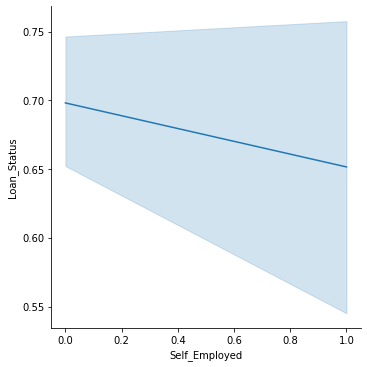

In [214]:
sns.relplot(x="Self_Employed",y="Loan_Status",data=df,kind='line')

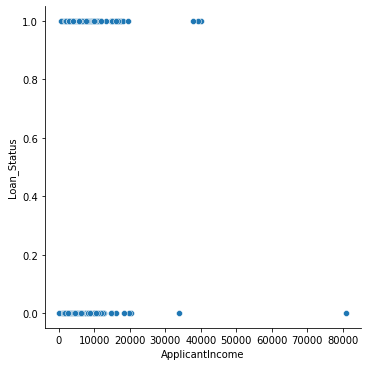

In [215]:
sns.relplot(x="ApplicantIncome",y="Loan_Status",data=df)

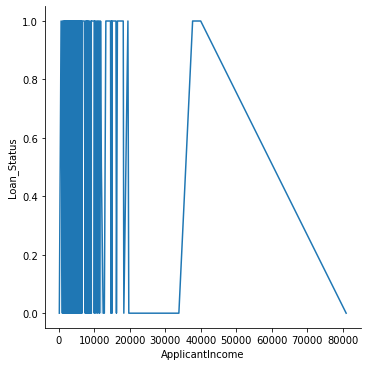

In [216]:
sns.relplot(x="ApplicantIncome",y="Loan_Status",data=df,kind='line')

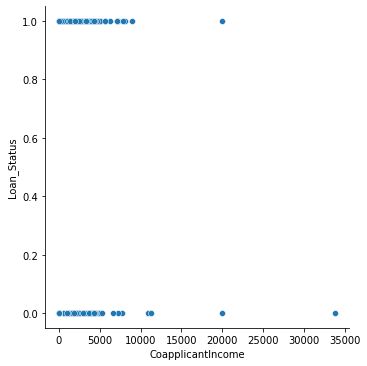

In [217]:
sns.relplot(x="CoapplicantIncome",y="Loan_Status",data=df)

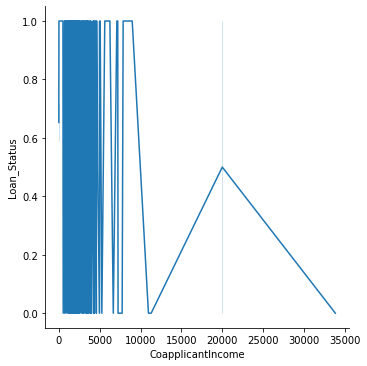

In [218]:
sns.relplot(x="CoapplicantIncome",y="Loan_Status",data=df,kind='line')

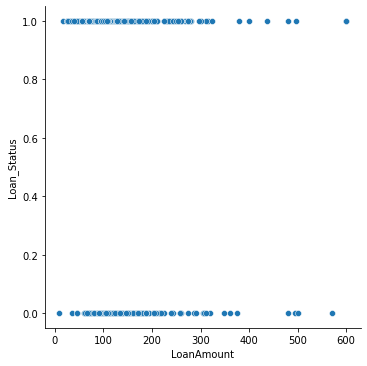

In [219]:
sns.relplot(x="LoanAmount",y="Loan_Status",data=df)

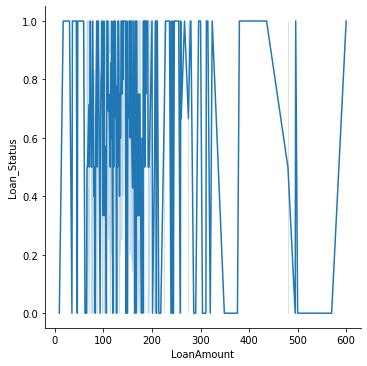

In [220]:
sns.relplot(x="LoanAmount",y="Loan_Status",data=df,kind='line')

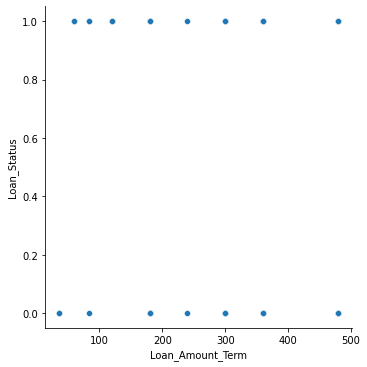

In [221]:
sns.relplot(x="Loan_Amount_Term",y="Loan_Status",data=df)

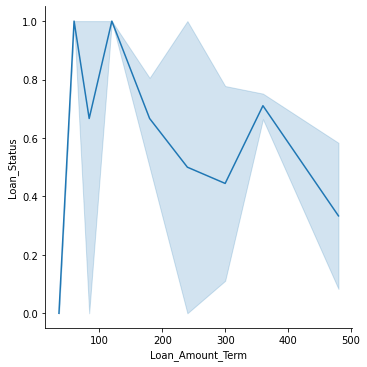

In [222]:
sns.relplot(x="Loan_Amount_Term",y="Loan_Status",data=df,kind='line')

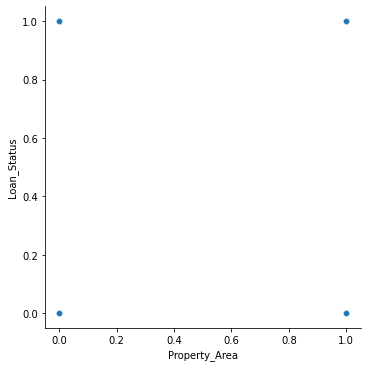

In [223]:
sns.relplot(x="Property_Area",y="Loan_Status",data=df)

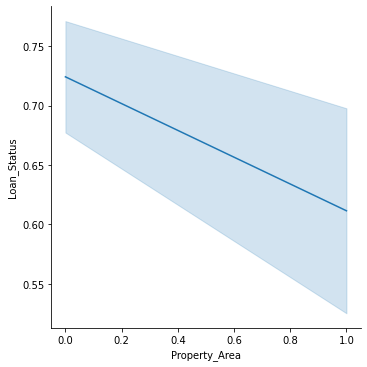

In [224]:
sns.relplot(x="Property_Area",y="Loan_Status",data=df,kind='line')

In [225]:
X=df.drop(['Loan_ID','Loan_Status','Dependents'],axis='columns')
y=df['Loan_Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [226]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC

In [227]:
# from sklearn.model_selection import cross_val_score
# X=df.drop(['Loan_ID','Loan_Status','Dependents'],axis='columns')
# y=df['Loan_Status']
# scores=cross_val_score(SVC(),X,y,cv=10)
# def print_scores(scores):
#     print("Scores:", scores)
#     print("Mean: ", scores.mean())
#     print("Standard deviation: ", scores.std())
# print_scores(scores)

In [228]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring
X=df.drop(['Loan_ID','Loan_Status','Dependents'],axis='columns')
y=df['Loan_Status']
Model_list=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs', max_iter=1000),RandomForestClassifier(),SVC()]
for model in Model_list:
    score_dict=all_model_scores(model,X,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

,DecisionTreeClassifier(),LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC()
0,0.708333,0.80625,0.78125,0.689583


In [229]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()

# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)

# from sklearn.svm import SVC
# model = SVC()


In [230]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [231]:
model.score(X_test,y_test)

0.8020833333333334

In [232]:
from sklearn import metrics
y_predicted=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

from sklearn import metrics
score=metrics.accuracy_score(y_test,y_predicted)
pre=metrics.precision_score(y_test, y_predicted)
recall=metrics.recall_score(y_test, y_predicted)
f1_score=2*pre*recall/(pre+recall)
print("F1_score:",f1_score)

Accuracy: 0.8020833333333334
Precision: 0.810126582278481
Recall: 0.9411764705882353
F1_score: 0.8707482993197279


In [233]:
print(metrics.confusion_matrix(y_test,y_predicted))

[[13 15]
 [ 4 64]]


In [234]:
confusion = metrics.confusion_matrix(y_test, y_predicted)

In [235]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [236]:
Accuracy_score=(TP+TN)/(TP+TN+FP+FN)
Accuracy_score

0.8020833333333334

In [237]:
error=1-Accuracy_score
error

0.19791666666666663

In [238]:
Precision=TP/(FP+TP)
Precision

0.810126582278481

In [239]:
recall=TP/(TP+FN)
recall

0.9411764705882353

In [240]:
2*Precision*recall/Precision+recall

2.8235294117647056